# **Imports**

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

from tensorflow.keras import datasets, layers, models # type: ignore

import matplotlib.pyplot as plt

import numpy as np

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

KeyboardInterrupt: 

## **Importing CIFAR Dataset**

In [ ]:
# This has 60,000 32x32 color images with 10 classes and 6000 images for each class.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### **Normalizing Data**

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## **Class Names**

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## **Show Image**

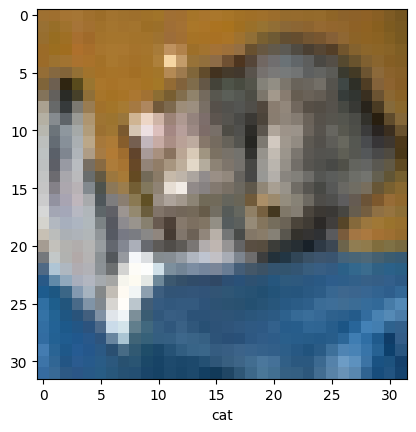

In [ ]:
img_selector = 0

plt.imshow(test_images[img_selector], cmap= plt.cm.binary)

plt.xlabel(class_names[test_labels[img_selector][0]])

plt.show()

# **Building Model**

In [ ]:
model = models.Sequential()

## **Convoluted Layers**

In [ ]:
model.add(layers.Conv2D(30, (3, 3), activation= 'relu', input_shape= (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(60, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(60, (3, 3), activation= 'relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 30)        840       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 60)        16260     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 60)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 60)          32460     
                                                                 
Total params: 49,560
Trainable params: 49,560
Non-trai

## **Dense Layers**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation= 'relu'))
model.add(layers.Dense(50, activation= 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 30)        840       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 60)        16260     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 60)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 60)          32460     
                                                                 
 flatten_2 (Flatten)         (None, 960)              

# **Compile Model**

In [ ]:
model.compile(  optimizer= 'adam',
                loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
                metrics= ['accuracy'])

history = model.fit(train_images, train_labels, epochs= 50, validation_data=(test_images, test_labels), verbose= 1)

Epoch 1/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5497 - accuracy: 0.4302 - val_loss: 1.2950 - val_accuracy: 0.5259
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1702 - accuracy: 0.5840 - val_loss: 1.0603 - val_accuracy: 0.6275
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0077 - accuracy: 0.6458 - val_loss: 0.9676 - val_accuracy: 0.6550
Epoch 4/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9040 - accuracy: 0.6809 - val_loss: 0.9358 - val_accuracy: 0.6647
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8327 - accuracy: 0.7066 - val_loss: 0.8943 - val_accuracy: 0.6920
Epoch 6/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7704 - accuracy: 0.7305 - val_loss: 0.9284 - val_accuracy: 0.6779
Epoch 7/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7204 - accuracy: 0.7471 - val_loss: 0.8694 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'{test_loss:.2f} | {test_acc:.2f}')

313/313 - 1s - loss: 2.3140 - accuracy: 0.6890 - 1s/epoch - 4ms/step
2.31 | 0.69


# **Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

augmented_history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs= 50, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5958 - accuracy: 0.4523 - val_loss: 1.1953 - val_accuracy: 0.5991
Epoch 2/50
1563/1563 [==============================] - 34s 21ms/step - loss: 1.3810 - accuracy: 0.5110 - val_loss: 1.0852 - val_accuracy: 0.6289
Epoch 3/50
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3114 - accuracy: 0.5378 - val_loss: 1.0283 - val_accuracy: 0.6420
Epoch 4/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2788 - accuracy: 0.5489 - val_loss: 1.1228 - val_accuracy: 0.6263
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2378 - accuracy: 0.5658 - val_loss: 1.0469 - val_accuracy: 0.6442
Epoch 6/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2124 - accuracy: 0.5721 - val_loss: 1.1584 - val_accuracy: 0.6166
Epoch 7/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1862 - accuracy: 0.5796 - val_loss: 0.9768 -

# **Making Predictions**

In [ ]:
predictions = model.predict(test_images)

img_selector = 10

plt.imshow(test_images[img_selector], cmap= plt.cm.binary)
plt.title('Expected: '+ class_names[test_labels[img_selector][0]])
plt.xlabel('Predicted: '+ class_names[np.argmax(predictions[img_selector])])

plt.show()

NameError: name 'model' is not defined